<a href="https://colab.research.google.com/github/mechamrit/StockAnalysis/blob/master/stock2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 2
In this we will learn about Plotting 

In [0]:
## Importing the Lib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime ,timedelta
import pandas_datareader.data as pdr
import seaborn as sns

In [0]:
## If working on different environment then upload csv from the previous module

#
# from google.colab import files
# uploaded = files.upload()
## Uncomment the above code to upload

In [3]:
## Now We will import Csv from previous module
## It takes column number only not name in below query against index_col
# df = pd.read_csv('google.csv',parse_dates=True,index_col=0)
df = pd.read_csv('google.csv')
df.head(3)

,Date,High,Low,Open,Close,Volume,Adj Close,Day_perc_change,Trend
0,2018-07-03,1135.819946,1100.020020,1135.819946,1102.890015,679000,1102.890015,-0.021792,Slight or No Change
1,2018-07-05,1127.500000,1108.479980,1110.530029,1124.270020,1066700,1124.270020,0.019385,Slight or No Change
2,2018-07-06,1140.930054,1120.737061,1123.579956,1140.170044,996100,1140.170044,0.014143,Slight or No Change


In [4]:
df.dtypes


Date                object
High               float64
Low                float64
Open               float64
Close              float64
Volume               int64
Adj Close          float64
Day_perc_change    float64
Trend               object
dtype: object

In [0]:
## As we can observe the Date is not the index as well as of type Object 
## For this we can make changes in import statement and import like this
### It takes column number only not name


# df = pd.read_csv('google.csv',parse_dates=True,index_col=0)
## Uncomment above for simplicity

In [6]:
## Lets explore the Longer Method or alternate method

## First of all we will convert the date to datetime64[ns]
df.Date = pd.to_datetime(df.Date)
df.dtypes

Date               datetime64[ns]
High                      float64
Low                       float64
Open                      float64
Close                     float64
Volume                      int64
Adj Close                 float64
Day_perc_change           float64
Trend                      object
dtype: object

In [7]:
## Now let us assign to the Index 
df = df.set_index(df.Date)
df.index

DatetimeIndex(['2018-07-03', '2018-07-05', '2018-07-06', '2018-07-09',
               '2018-07-10', '2018-07-11', '2018-07-12', '2018-07-13',
               '2018-07-16', '2018-07-17',
               ...
               '2019-06-18', '2019-06-19', '2019-06-20', '2019-06-21',
               '2019-06-24', '2019-06-25', '2019-06-26', '2019-06-27',
               '2019-06-28', '2019-07-01'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

In [8]:
df.drop(columns='Date',inplace=True)
df.head(3)

,High,Low,Open,Close,Volume,Adj Close,Day_perc_change,Trend
Date,,,,,,,,
2018-07-03,1135.819946,1100.020020,1135.819946,1102.890015,679000,1102.890015,-0.021792,Slight or No Change
2018-07-05,1127.500000,1108.479980,1110.530029,1124.270020,1066700,1124.270020,0.019385,Slight or No Change
2018-07-06,1140.930054,1120.737061,1123.579956,1140.170044,996100,1140.170044,0.014143,Slight or No Change


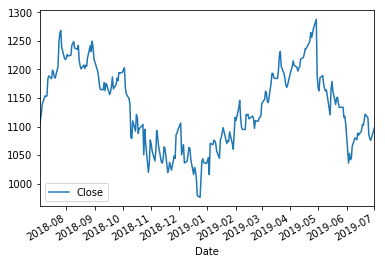

In [9]:
%matplotlib inline
## Now Let us plot the Data Frame
df.Close.plot()
plt.legend()
plt.show()

Now we will plot graph known as stem plot. It is ideally used for daywise data. We will plot it by using plt.stem()

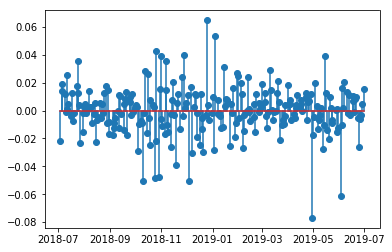

In [10]:
%matplotlib inline
from google.colab import files
fig = plt.figure()
plt.stem(df.index, df.Day_perc_change)
plt.show()
fig.savefig('my_figure.png')
# files.download('my_figure.png') 
## Uncomment this for downloading fig to your local machine

### Plotting Pie Chart
- We had a Trend Column, let us see how often each trend type occurs. This can be seen as a pie chart.

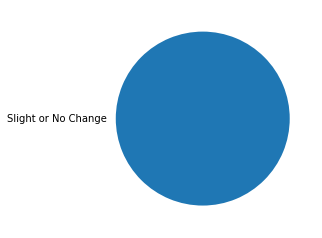

In [11]:
%matplotlib inline

## First of all we have to group data 
pied = df.groupby('Trend')['Close'].count()
## Chose any Column to get a value or can extract later

xv = (pied.keys())
yval = (pied.values)
xval = xv.values

## Plotting the Pie chart
plt.pie(yval,labels=xval)
plt.show()

## As we know that google stocks are quite stable so there was no value other then Slight or No change

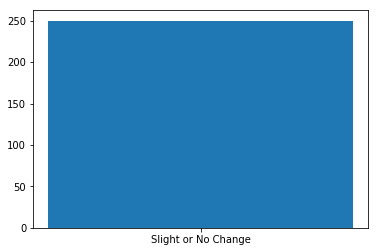

In [12]:
%matplotlib inline
plt.bar(xval,yval)
plt.show()

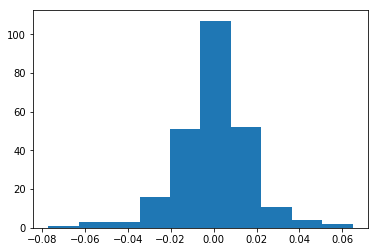

In [13]:
%matplotlib inline

plt.hist(df.Day_perc_change)
plt.show()

### We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price.


In [14]:
## We will load the five stocks in dataframe
##datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])
start = datetime(2018 , 7 ,1)
end = datetime(2019, 7 , 1)

## Reading data and saving only Close Price in other data frame.
data = pdr.DataReader(['AAPL','GOOG','MSFT','BABA','NVDA'],'yahoo',start,end)
db = data.Close
db.head(3)

Symbols,AAPL,BABA,GOOG,MSFT,NVDA
Date,,,,,
2018-07-02,187.179993,186.360001,1127.459961,100.010002,242.240005
2018-07-03,183.919998,184.750000,1102.890015,99.050003,236.839996
2018-07-05,185.399994,186.880005,1124.270020,99.760002,242.729996


### Pair Plotting the Close Price of all of the above companies

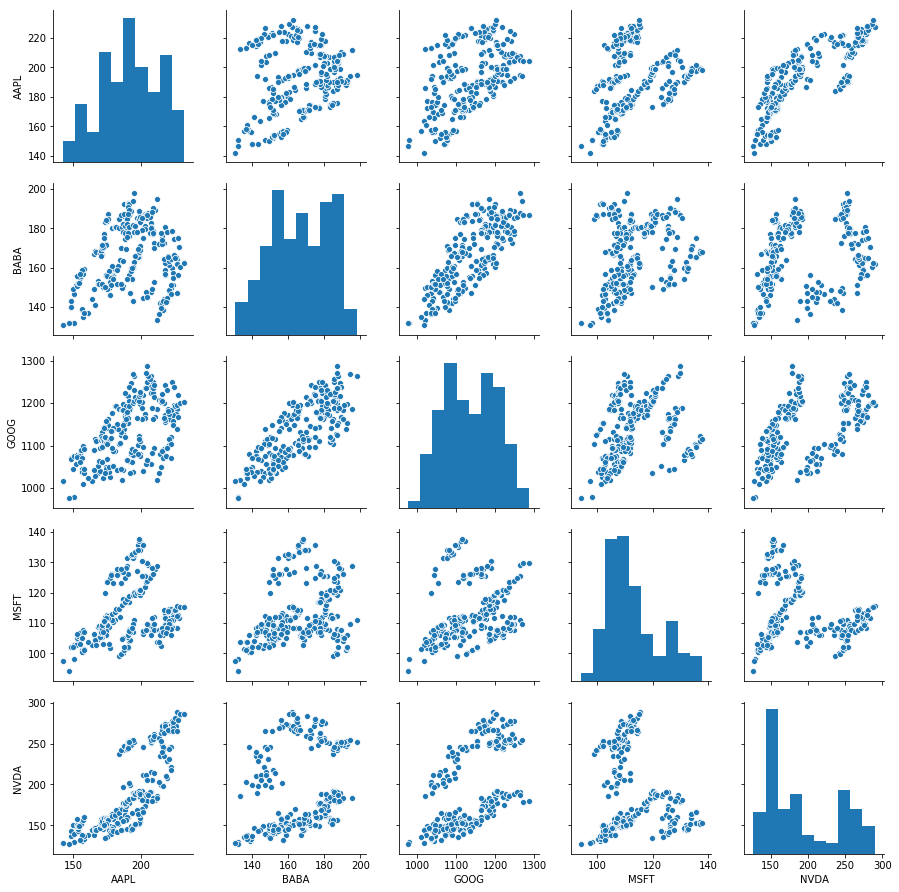

In [15]:
%matplotlib inline
## Now we have Close Price for all of the Above 
## Now Plotting with Pair plot
sns.pairplot(db)

### [Volatility](https://www.investopedia.com/terms/v/volatility.asp) is the change in variance in return of a stock over a specific period of time.
<br> We will calulate the 14 day rolling average of percentage change and then calculate the std deviation.

In [16]:
db = db.pct_change()
db.dropna(inplace=True)
db.head(3)

Symbols,AAPL,BABA,GOOG,MSFT,NVDA
Date,,,,,
2018-07-03,-0.017416,-0.008639,-0.021792,-0.009599,-0.022292
2018-07-05,0.008047,0.011529,0.019385,0.007168,0.024869
2018-07-06,0.013862,0.028842,0.014143,0.014034,0.018951


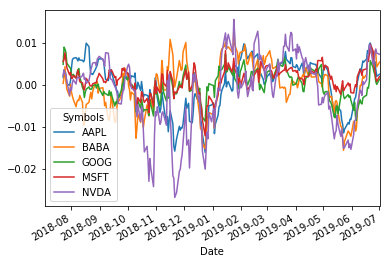

In [17]:
## Plotting the mean of all symbols
%matplotlib inline
db.rolling(window=14).mean().plot()

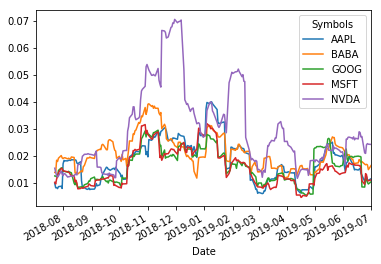

In [18]:
## Plotting the standard deviation 
db.rolling(window=14).std().plot()

In [19]:
## Now Caculating Volatility
volatility = db.rolling(14).std() * np.sqrt(14)
volatility.dropna(inplace=True)
volatility.head(3)

Symbols,AAPL,BABA,GOOG,MSFT,NVDA
Date,,,,,
2018-07-23,0.037048,0.052334,0.047442,0.038634,0.058189
2018-07-24,0.031056,0.052289,0.047258,0.036312,0.052324
2018-07-25,0.031304,0.069206,0.046109,0.043245,0.048252


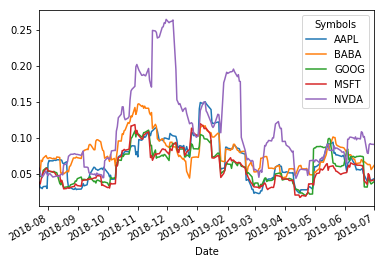

In [20]:
## PLotting the Volatility of the Stocks
volatility.plot()

### Calculate the volatility for the S&P 500 and compare </br> This will leads us to a useful indicator known as 'Beta' 

In [0]:
d2 = pdr.DataReader('^GSPC','yahoo',start,end)
db1 = d2.Close

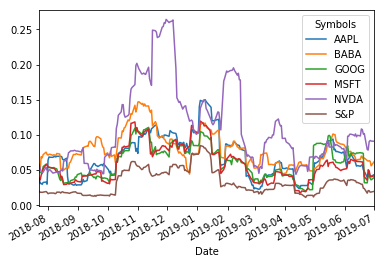

In [22]:
volSP = db1.pct_change().rolling(14).std() * np.sqrt(14)
volSP.dropna(inplace=True)
volatility['S&P'] = volSP
volatility.plot()

## Actually S&P is index of top 500 companies read more.(https://en.wikipedia.org/wiki/S%26P_500_Index)

As we can observe from S&P and companies price are directly proportional except for nvidea which has its highs and low this can be due to companies decisions or internal matter like change in power.

## Trade Calls
Trade Calls - Using Simple Moving Averages. Study about moving averages here. Plot the 21 day and 34 day Moving average with the average price and decide a Call !
Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average.
One of the most widely used technical indicators.

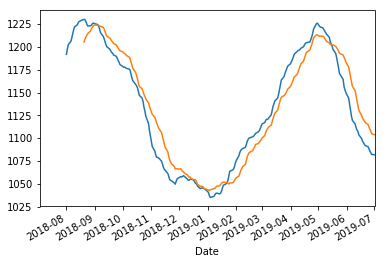

In [23]:
%matplotlib inline
a = df.Close.rolling(21).mean()
a.plot()
b = df.Close.rolling(34).mean()
b.plot()
plt.show()

In [24]:
posn = b-a
mk = pd.DataFrame(index=posn.index)
def mkcall(pa):
    if(pa < 0):
        return "buy"
    else:
        return "sell"
        
    
mk['call'] = posn.apply(mkcall)
print('Buy on dates',mk[mk['call']=='buy'])
print('Sell on dates',mk[mk['call']=='sell'])


Buy on dates            call
Date           
2018-08-20  buy
2018-08-21  buy
2018-08-22  buy
2018-08-23  buy
2018-08-24  buy
2018-08-27  buy
2018-08-28  buy
2018-08-29  buy
2018-08-30  buy
2018-08-31  buy
2018-09-04  buy
2019-01-23  buy
2019-01-24  buy
2019-01-25  buy
2019-01-28  buy
2019-01-29  buy
2019-01-30  buy
2019-01-31  buy
2019-02-01  buy
2019-02-04  buy
2019-02-05  buy
2019-02-06  buy
2019-02-07  buy
2019-02-08  buy
2019-02-11  buy
2019-02-12  buy
2019-02-13  buy
2019-02-14  buy
2019-02-15  buy
2019-02-19  buy
...         ...
2019-04-03  buy
2019-04-04  buy
2019-04-05  buy
2019-04-08  buy
2019-04-09  buy
2019-04-10  buy
2019-04-11  buy
2019-04-12  buy
2019-04-15  buy
2019-04-16  buy
2019-04-17  buy
2019-04-18  buy
2019-04-22  buy
2019-04-23  buy
2019-04-24  buy
2019-04-25  buy
2019-04-26  buy
2019-04-29  buy
2019-04-30  buy
2019-05-01  buy
2019-05-02  buy
2019-05-03  buy
2019-05-06  buy
2019-05-07  buy
2019-05-08  buy
2019-05-09  buy
2019-05-10  buy
2019-05-13  buy
2019-05-14 

Trade Calls - Using Bollinger Bands</br>
Plot the bollinger bands for this stock - the duration of 14 days and 2 </br>standard deviations away from the average</br>
The bollinger bands comprise the following data points-

    The 14 day rolling mean of the closing price (we call it the average) 
    Upper band which is the rolling mean + 2 standard deviations away from the average. 
    Lower band which is the rolling mean - 2 standard deviations away from the average. 
    Average Daily stock price.

Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market.

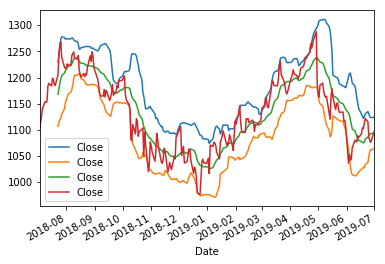

In [25]:
%matplotlib inline
average =  df.Close.rolling(14).mean()
stdd = df.Close.rolling(14).std()

upperband = average + 2*stdd
lowerband = average - 2*stdd

upperband.plot()
lowerband.plot()
average.plot()
df.Close.plot()
plt.legend()
plt.show()

In [0]:

df['Upperband'] = upperband.values
df['Lowerband'] = lowerband.values
df['Middle'] = average.values
df.to_csv('boll.csv')

## Ending of the module2